In [7]:
import os as os
import random
random.seed(123)

In [8]:
os.chdir("C:\\Users\\Ankita\\Desktop\\mall_customers")

In [9]:
os.listdir()

['Mall_Customers.csv']

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv("Mall_Customers.csv")

In [12]:
data.shape

(200, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
data.isnull().sum() #check missing value

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
data.rename(columns={'Genre' : 'Gender'},inplace=True)

In [16]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Age', ylabel='Count'>

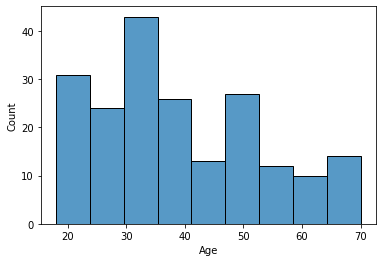

In [18]:
sns.histplot(data["Age"])

<AxesSubplot:xlabel='Age'>

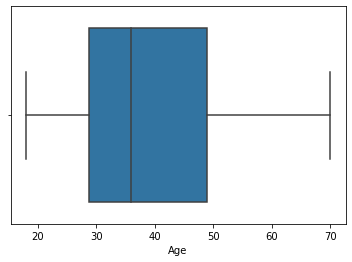

In [19]:
sns.boxplot(data["Age"])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

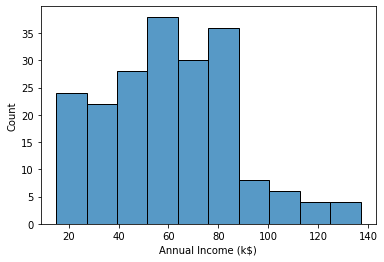

In [20]:
sns.histplot(data["Annual Income (k$)"])

<AxesSubplot:xlabel='Annual Income (k$)'>

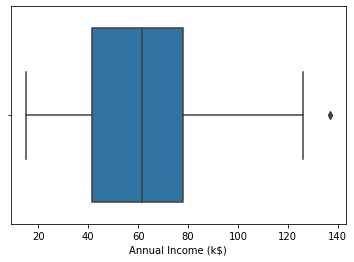

In [30]:
sns.boxplot(data["Annual Income (k$)"])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

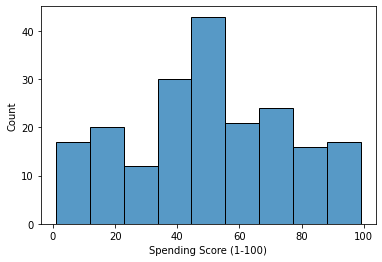

In [21]:
sns.histplot(data["Spending Score (1-100)"])

<AxesSubplot:xlabel='Spending Score (1-100)'>

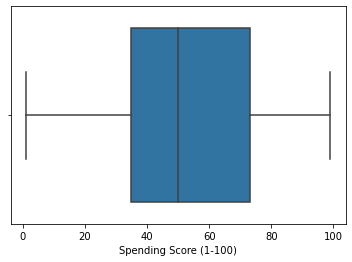

In [22]:
sns.boxplot(data["Spending Score (1-100)"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

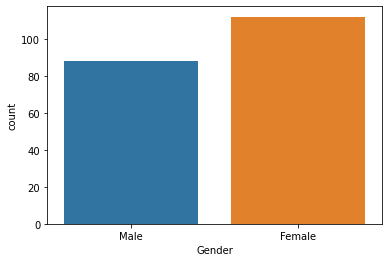

In [23]:
sns.countplot(x=data['Gender'])

In [24]:
data.drop(['CustomerID'],axis=1,inplace=True)

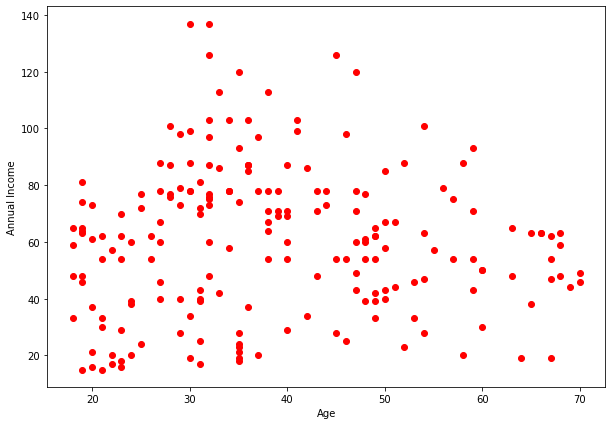

In [32]:
plt.figure(figsize=(10,7))
plt.scatter(data["Age"],data["Annual Income (k$)"],color="red")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

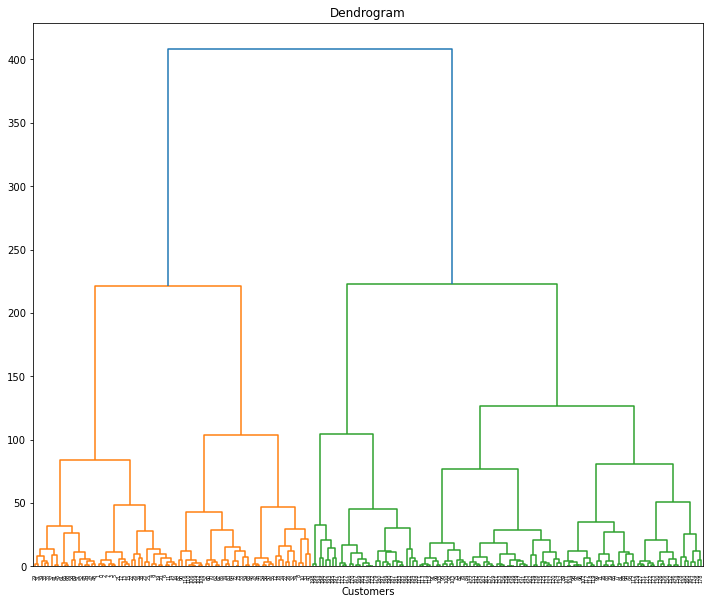

In [26]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,10))
dendrogram=sch.dendrogram(sch.linkage(data[["Age","Annual Income (k$)"]],method="ward")) #ward meaning use wcss in background.
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete") #complete means farest obs, euclidean distance is used, cluster is 5
#linkage= single, ward, complete, centroid
cluster.fit_predict(data[["Age","Annual Income (k$)"]])

array([1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 2, 1, 4, 2, 1, 2, 4, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [28]:
?cluster

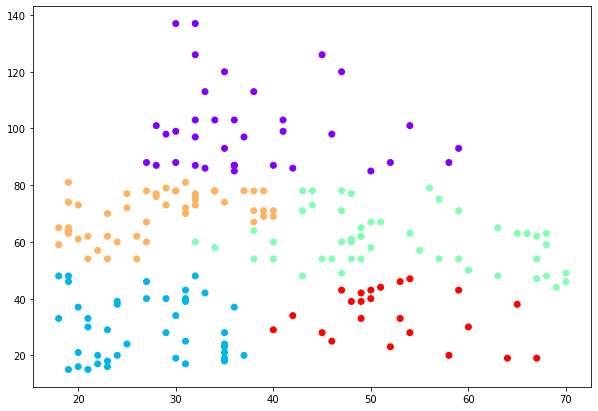

In [29]:
plt.figure(figsize=(10,7))
plt.scatter(data['Age'],data['Annual Income (k$)'],c=cluster.labels_,cmap="rainbow")
plt.show()
